# RNN Test

In [10]:
WORK_FOLDER='../'

In [11]:
import sys
sys.path.append(WORK_FOLDER)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from utils.helper import loadCovidData, plotPlaces
from utils.RNN import RNN
%matplotlib inline

In [13]:
df = loadCovidData(prefix=WORK_FOLDER)
df_total = df.groupby(by='fecha_informe').sum().reset_index()
unique_place = 'Comunidad de Madrid'
df_total['municipio_distrito'] = df_total.apply(lambda x: unique_place, axis=1)
_, df_total_inc = plotPlaces(df_total, np.array(['Comunidad de Madrid']), agg_factor=1, plot=False)
serie = df_total_inc['Contagios diarios'].to_numpy()

<Figure size 1440x504 with 0 Axes>

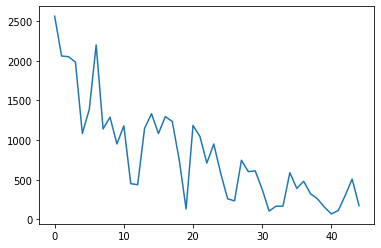

In [14]:
plt.plot(serie)

In [31]:
rnn = RNN(data=serie, window_size=14, lstm_units=16, epochs=150)

In [32]:
history, score = rnn.train(verbose=2)

Train on 24 samples, validate on 7 samples
Epoch 1/150
 - 3s - loss: 0.1137 - val_loss: 0.1100
Epoch 2/150
 - 0s - loss: 0.0968 - val_loss: 0.0937
Epoch 3/150
 - 0s - loss: 0.0833 - val_loss: 0.0799
Epoch 4/150
 - 0s - loss: 0.0729 - val_loss: 0.0689
Epoch 5/150
 - 0s - loss: 0.0654 - val_loss: 0.0605
Epoch 6/150
 - 0s - loss: 0.0601 - val_loss: 0.0541
Epoch 7/150
 - 0s - loss: 0.0562 - val_loss: 0.0492
Epoch 8/150
 - 0s - loss: 0.0532 - val_loss: 0.0454
Epoch 9/150
 - 0s - loss: 0.0509 - val_loss: 0.0423
Epoch 10/150
 - 0s - loss: 0.0490 - val_loss: 0.0398
Epoch 11/150
 - 0s - loss: 0.0473 - val_loss: 0.0377
Epoch 12/150
 - 0s - loss: 0.0459 - val_loss: 0.0360
Epoch 13/150
 - 0s - loss: 0.0445 - val_loss: 0.0345
Epoch 14/150
 - 0s - loss: 0.0433 - val_loss: 0.0332
Epoch 15/150
 - 0s - loss: 0.0422 - val_loss: 0.0320
Epoch 16/150
 - 0s - loss: 0.0411 - val_loss: 0.0309
Epoch 17/150
 - 0s - loss: 0.0400 - val_loss: 0.0300
Epoch 18/150
 - 0s - loss: 0.0390 - val_loss: 0.0291
Epoch 19/150

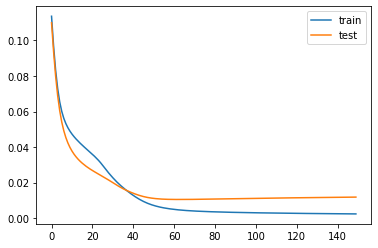

In [33]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [34]:
print('score: ',score)

score:  0.011808368510433606


In [35]:
y, y_pred = rnn.getAllPredictions()

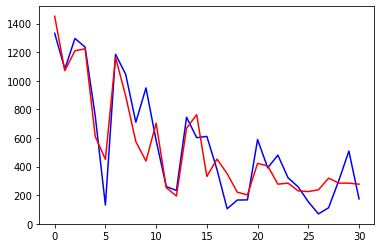

In [36]:
plt.plot(y,'b',y_pred,'r')

In [37]:
preds = rnn.predict(40)

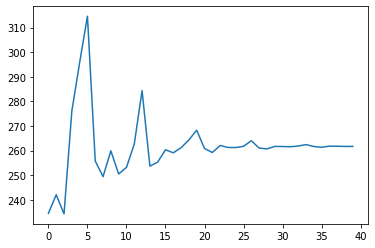

In [38]:
plt.plot(preds)